In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("HeartDiseaseRiskData.csv")

In [4]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS>120,ExerciseAngina,HeartDisease
0,74.000000,155.0,434.638361,No,No,1.000000
1,125.984818,123.0,219.000000,No,Yes,0.000000
2,125.984818,99.0,220.000000,No,No,1.000000
3,60.000000,162.0,157.000000,Yes,Yes,NaN
4,31.000000,127.0,258.000000,No,No,3.006974


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             180 non-null    float64
 1   RestingBP       182 non-null    float64
 2   Cholesterol     180 non-null    float64
 3   FastingBS>120   200 non-null    object 
 4   ExerciseAngina  200 non-null    object 
 5   HeartDisease    182 non-null    float64
dtypes: float64(4), object(2)
memory usage: 9.5+ KB


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,HeartDisease
count,180.000000,182.000000,180.000000,182.000000
mean,58.010268,140.828300,234.813242,0.626757
std,21.679140,39.489199,63.669822,0.754086
min,30.000000,90.000000,151.000000,0.000000
25%,42.000000,112.000000,190.000000,0.000000
50%,53.000000,136.000000,229.000000,1.000000
75%,69.000000,159.250000,265.000000,1.000000
max,125.984818,265.075054,434.638361,3.006974


In [7]:
df = df[df['HeartDisease'].isin([0.0, 1.0])]

In [8]:
df.isnull().sum()

Age               17
RestingBP         14
Cholesterol       17
FastingBS>120      0
ExerciseAngina     0
HeartDisease       0
dtype: int64

In [9]:
for col in ['Age', 'RestingBP', 'Cholesterol']:
    df[col] = df[col].fillna(df[col].median())

In [10]:
df['FastingBS>120'] = df['FastingBS>120'].map({'Yes': 1, 'No': 0})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Yes': 1, 'No': 0})

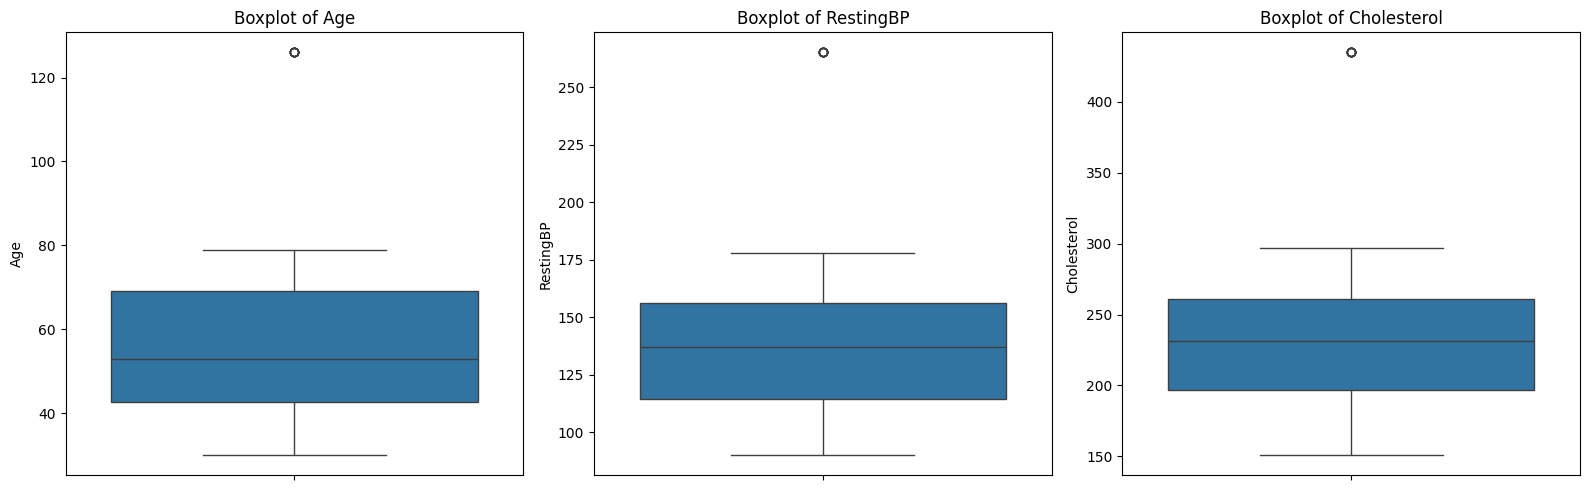

In [11]:
plt.figure(figsize=(16, 5))
for i, col in enumerate(['Age', 'RestingBP', 'Cholesterol']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

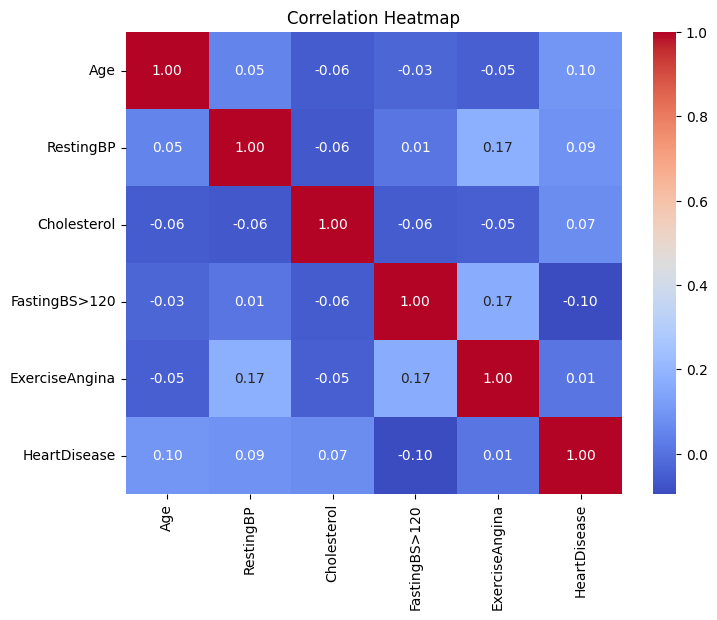

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

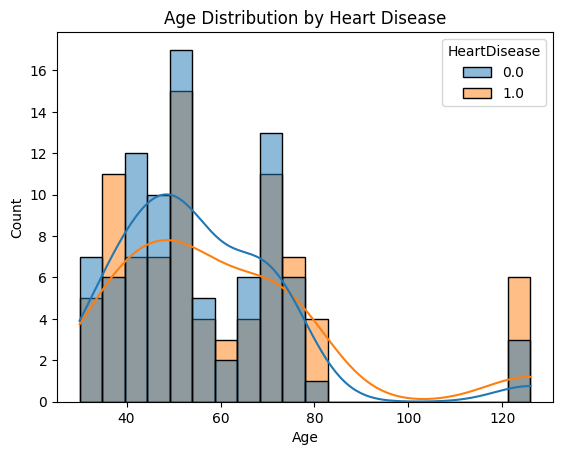

In [13]:
sns.histplot(data=df, x='Age', hue='HeartDisease', kde=True, bins=20)
plt.title("Age Distribution by Heart Disease")
plt.show()

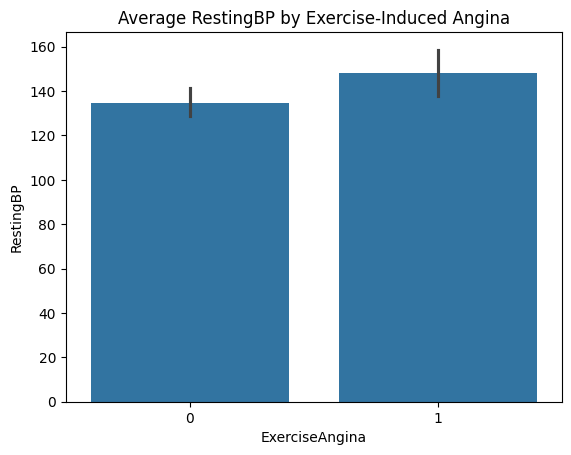

In [14]:
sns.barplot(x='ExerciseAngina', y='RestingBP', data=df)
plt.title("Average RestingBP by Exercise-Induced Angina")
plt.show()

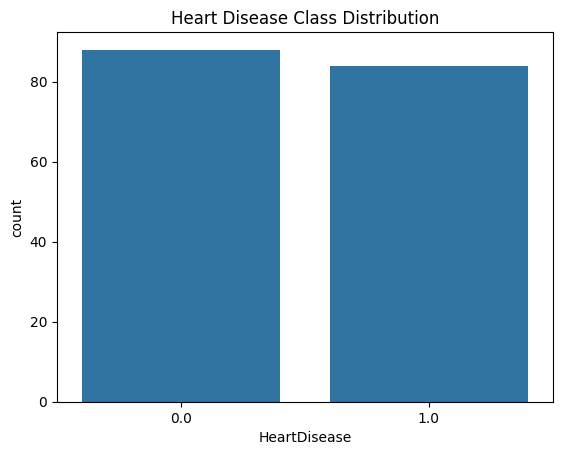

In [15]:
sns.countplot(x='HeartDisease', data=df)
plt.title("Heart Disease Class Distribution")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [17]:
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

In [21]:
print("Model: Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

Model: Logistic Regression
Accuracy: 0.5142857142857142
Classification Report:
              precision    recall  f1-score   support

         0.0       0.52      0.67      0.59        18
         1.0       0.50      0.35      0.41        17

    accuracy                           0.51        35
   macro avg       0.51      0.51      0.50        35
weighted avg       0.51      0.51      0.50        35

Confusion Matrix:
[[12  6]
 [11  6]]


In [22]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [23]:
print("Model: Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))

Model: Decision Tree
Accuracy: 0.5714285714285714
Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.61      0.59        18
         1.0       0.56      0.53      0.55        17

    accuracy                           0.57        35
   macro avg       0.57      0.57      0.57        35
weighted avg       0.57      0.57      0.57        35

Confusion Matrix:
[[11  7]
 [ 8  9]]


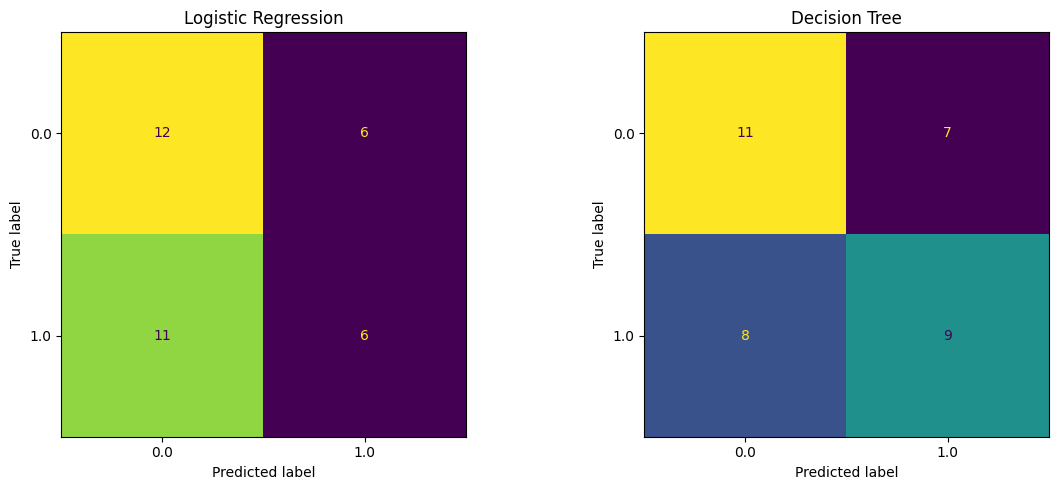

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log, ax=axes[0], colorbar=False)
axes[0].set_title("Logistic Regression")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, ax=axes[1], colorbar=False)
axes[1].set_title("Decision Tree")
plt.tight_layout()
plt.show()

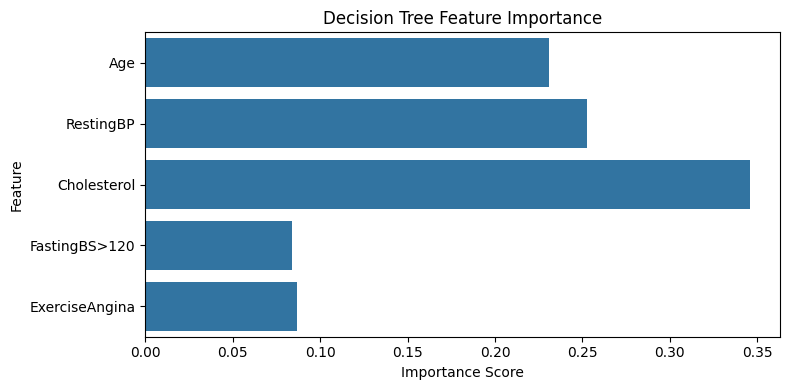

In [25]:
importances = tree.feature_importances_
features = X.columns

plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=features)
plt.title("Decision Tree Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [26]:
import pandas as pd
def predict_Heart_risk():
    print("\n Heart Disease Risk Predictor ")
    print("-------------------------------------------")

    try:
        age = float(input("Enter Age: "))
        bp = float(input("Enter Resting Blood Pressure: "))
        chol = float(input("Enter Cholesterol Level: "))
        fbs_input = input("Fasting Blood Sugar > 120 mg/dl (Yes/No): ").strip().capitalize()
        angina_input = input("Exercise-Induced Angina (Yes/No): ").strip().capitalize()

        if fbs_input not in ['Yes', 'No'] or angina_input not in ['Yes', 'No']:
            raise ValueError("FastingBS and Angina should be 'Yes' or 'No'.")

        fasting_bs = 1 if fbs_input == "Yes" else 0
        angina = 1 if angina_input == "Yes" else 0
        
        input_data = pd.DataFrame([[age, bp, chol, fasting_bs, angina]],
                                  columns=['Age', 'RestingBP', 'Cholesterol', 'FastingBS>120', 'ExerciseAngina'])

        input_scaled = scaler.transform(input_data)
        pred_log = log_reg.predict(input_scaled)[0]
        prob_log = log_reg.predict_proba(input_scaled)[0][1]

        pred_tree = tree.predict(input_data)[0]
        prob_tree = tree.predict_proba(input_data)[0][1]


        print("\n Prediction Results:")
        print("----------------------")
        print("Logistic Regression:")
        print(" - Risk: {}".format(" At Risk" if pred_log == 1 else " Not at Risk"))
        print(" - Probability: {:.2f}".format(prob_log))

        print("\nDecision Tree:")
        print(" - Risk: {}".format(" At Risk" if pred_tree == 1 else " Not at Risk"))
        print(" - Probability: {:.2f}".format(prob_tree))

    except Exception as e:
        print("\nError: {}".format(e))


predict_Heart_risk()




 Heart Disease Risk Predictor 
-------------------------------------------


Enter Age:  55
Enter Resting Blood Pressure:  155
Enter Cholesterol Level:  394
Fasting Blood Sugar > 120 mg/dl (Yes/No):  No
Exercise-Induced Angina (Yes/No):  No



 Prediction Results:
----------------------
Logistic Regression:
 - Risk:  At Risk
 - Probability: 0.66

Decision Tree:
 - Risk:  At Risk
 - Probability: 1.00
